In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-may-2022/train.csv
/kaggle/input/tabular-playground-series-may-2022/test.csv


In [28]:
sample_submission_dir = '/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv'
train_data_dir = '/kaggle/input/tabular-playground-series-may-2022/train.csv'
test_data_dir = '/kaggle/input/tabular-playground-series-may-2022/test.csv'

train_df = pd.read_csv(train_data_dir).drop(['id'],axis=1)
test_df = pd.read_csv(test_data_dir)

In [29]:
train_df.tail()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
899995,1.380145,-0.038884,0.597111,0.854560,0.684301,-1.058618,1.310699,2,1,2,...,-1.594744,0.522019,0.833047,2.714125,1.290094,BABBCBBBED,455.033851,0,2,1
899996,-1.369789,0.044841,0.015458,0.376565,-0.380529,-0.830815,-1.798458,4,1,2,...,2.413899,-0.674942,-0.412111,-0.030436,-3.144047,BBBGBBDQBE,134.703577,0,1,0
899997,1.386201,-0.961150,0.725994,-0.132844,0.873911,-0.245339,-1.045786,0,0,6,...,-0.151930,-4.560773,-1.249154,1.793535,2.253696,AEBEDBBHBA,-99.536313,0,1,0
899998,-1.590572,-0.509938,-1.715397,-0.249988,1.359933,1.650808,-0.058592,0,2,2,...,2.423670,2.110008,0.561271,-2.149610,1.019982,ADBAAADDAE,47.823039,1,2,0
899999,-0.636210,-0.425986,-1.826699,-0.598797,1.589577,-0.482298,-0.214093,7,1,4,...,1.340696,3.762351,1.797137,-0.412837,2.090440,BCAACADSCE,-44.559296,0,2,1


In [30]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
f_00,900000.0,-0.000286,0.998888,-4.599856,-0.675490,0.001144,0.674337,4.749301
f_01,900000.0,0.001165,0.999193,-4.682199,-0.675162,0.002014,0.675021,4.815699
f_02,900000.0,0.001174,1.000514,-4.642676,-0.674369,0.002218,0.677505,4.961982
f_03,900000.0,-0.001368,1.000175,-4.658816,-0.676114,-0.002227,0.672544,4.454920
f_04,900000.0,-0.000571,1.000167,-4.748501,-0.675909,-0.001662,0.673789,4.948983
f_05,900000.0,0.000284,0.999875,-4.750214,-0.673437,-0.000438,0.675028,4.971881
f_06,900000.0,-0.000709,0.999942,-4.842919,-0.674876,-0.001492,0.674749,4.822668
f_07,900000.0,2.031460,1.656172,0.000000,1.000000,2.000000,3.000000,15.000000
f_08,900000.0,2.057998,1.590955,0.000000,1.000000,2.000000,3.000000,16.000000
f_09,900000.0,2.362431,1.637706,0.000000,1.000000,2.000000,3.000000,14.000000


In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   f_00    900000 non-null  float64
 1   f_01    900000 non-null  float64
 2   f_02    900000 non-null  float64
 3   f_03    900000 non-null  float64
 4   f_04    900000 non-null  float64
 5   f_05    900000 non-null  float64
 6   f_06    900000 non-null  float64
 7   f_07    900000 non-null  int64  
 8   f_08    900000 non-null  int64  
 9   f_09    900000 non-null  int64  
 10  f_10    900000 non-null  int64  
 11  f_11    900000 non-null  int64  
 12  f_12    900000 non-null  int64  
 13  f_13    900000 non-null  int64  
 14  f_14    900000 non-null  int64  
 15  f_15    900000 non-null  int64  
 16  f_16    900000 non-null  int64  
 17  f_17    900000 non-null  int64  
 18  f_18    900000 non-null  int64  
 19  f_19    900000 non-null  float64
 20  f_20    900000 non-null  float64
 21  f_21    90

In [32]:
from sklearn.preprocessing import LabelEncoder

# Processing Column f_27 by applying Label Encoding
print(np.unique(train_df['f_27']).shape)
label_encoder_f27 = LabelEncoder()
train_df['f_27_le'] = label_encoder_f27.fit_transform(train_df['f_27'])
train_df.drop(['f_27'],axis=1,inplace=True)

train_df.info()

(741354,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 32 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f_00     900000 non-null  float64
 1   f_01     900000 non-null  float64
 2   f_02     900000 non-null  float64
 3   f_03     900000 non-null  float64
 4   f_04     900000 non-null  float64
 5   f_05     900000 non-null  float64
 6   f_06     900000 non-null  float64
 7   f_07     900000 non-null  int64  
 8   f_08     900000 non-null  int64  
 9   f_09     900000 non-null  int64  
 10  f_10     900000 non-null  int64  
 11  f_11     900000 non-null  int64  
 12  f_12     900000 non-null  int64  
 13  f_13     900000 non-null  int64  
 14  f_14     900000 non-null  int64  
 15  f_15     900000 non-null  int64  
 16  f_16     900000 non-null  int64  
 17  f_17     900000 non-null  int64  
 18  f_18     900000 non-null  int64  
 19  f_19     900000 non-null  float64
 20  f_20     900000 

In [33]:
def memory_reduce(df):
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != 'object' and col_type != "datetime64[ns]":
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    return df

In [35]:
train_X = memory_reduce(train_df)
train_y = train_X['target']
train_X.drop('target',axis=1,inplace=True)
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 31 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f_00     900000 non-null  float32
 1   f_01     900000 non-null  float32
 2   f_02     900000 non-null  float32
 3   f_03     900000 non-null  float32
 4   f_04     900000 non-null  float32
 5   f_05     900000 non-null  float32
 6   f_06     900000 non-null  float32
 7   f_07     900000 non-null  int8   
 8   f_08     900000 non-null  int8   
 9   f_09     900000 non-null  int8   
 10  f_10     900000 non-null  int8   
 11  f_11     900000 non-null  int8   
 12  f_12     900000 non-null  int8   
 13  f_13     900000 non-null  int8   
 14  f_14     900000 non-null  int8   
 15  f_15     900000 non-null  int8   
 16  f_16     900000 non-null  int8   
 17  f_17     900000 non-null  int8   
 18  f_18     900000 non-null  int8   
 19  f_19     900000 non-null  float32
 20  f_20     900000 non-null  

SelectKBest()


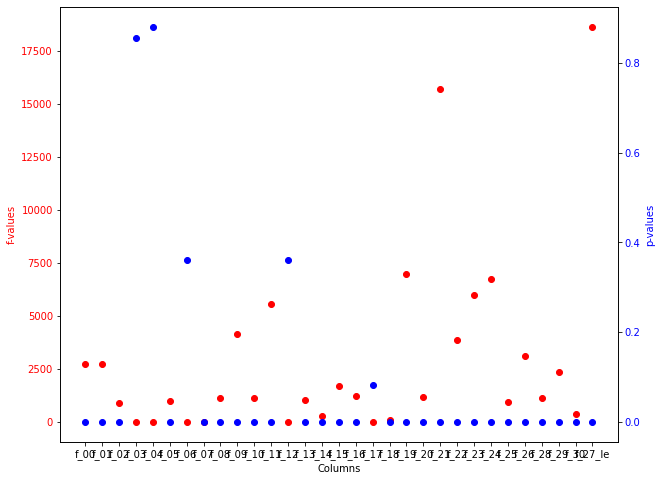

In [58]:
from sklearn.feature_selection import f_classif, SelectKBest

f_values,p_values = f_classif(train_X, train_y)
print(SelectKBest())

fig, ax1 = plt.subplots(figsize=(10,8)) 
  
ax1.set_xlabel('Columns') 
ax1.set_ylabel('f-values', color = 'red') 
ax1.scatter(train_X.columns.values, f_values, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
  
# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('p-values', color = 'blue') 
ax2.scatter(train_X.columns.values, p_values, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
 
# Show plot

plt.show()

In [84]:
test = SelectKBest(score_func=f_classif, k=10)
fit = test.fit(train_X, train_y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(train_X)
# summarize selected features
print(features[0:5,:])

[2.758e+03 2.732e+03 9.119e+02 3.327e-02 2.280e-02 9.840e+02 8.378e-01
 2.487e+01 1.157e+03 4.170e+03 1.131e+03 5.584e+03 8.330e-01 1.047e+03
 2.785e+02 1.690e+03 1.254e+03 3.020e+00 1.046e+02 6.975e+03 1.207e+03
 1.569e+04 3.884e+03 5.974e+03 6.761e+03 9.714e+02 3.135e+03 1.157e+03
 2.375e+03 3.866e+02 1.864e+04]
[[-1.373e+00  1.000e+00  3.000e+00  2.982e-01  3.059e+00 -2.541e+00
   7.670e-01 -2.731e+00  1.363e+00  5.807e+04]
 [ 1.697e+00  4.000e+00  2.000e+00 -3.148e+00  2.179e+00  2.278e+00
  -6.337e-01 -1.217e+00 -5.832e-02  1.550e+05]
 [ 1.682e+00  2.000e+00  6.000e+00  2.821e+00 -7.842e-01 -1.386e+00
  -5.206e-01 -9.121e-03 -3.703e+00  1.532e+04]
 [-1.182e-01  1.000e+00  1.000e+00  1.081e+00 -2.344e+00  5.726e-01
  -1.653e+00  1.686e+00 -6.086e-01  6.587e+05]
 [ 1.148e+00  0.000e+00  3.000e+00 -1.262e-01  1.134e+00 -3.913e+00
  -1.430e+00  2.128e+00  4.371e+00  6.739e+05]]


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(
    features, train_y, test_size=0.2, random_state=1)
print("Train data shape : ",X_train.shape,y_train.shape)
print("Validation data shape : ",X_val.shape,y_val.shape)

scaler_X = StandardScaler()
scaler_X.fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_train_scaled.mean(axis=0)

Train data shape :  (720000, 10) (720000,)
Validation data shape :  (180000, 10) (180000,)


array([-6.745e-18,  8.298e-16,  1.070e-14, -5.709e-17, -2.300e-17,
       -8.371e-18, -7.316e-17,  5.567e-17, -4.796e-17,  1.114e-16])

In [86]:
from sklearn.linear_model import Perceptron

perceptron_model = Perceptron(
    eta0=0.1, # Learning rate of the model
    random_state=1
)
perceptron_model.fit(
    X_train_scaled,
    y_train
)
perceptron_prediction = perceptron_model.predict(X_val_scaled)
perceptron_accuracy = (perceptron_prediction==y_val).sum()/y_val.shape[0]
print("Perceptron model accuracy is : ", perceptron_accuracy)

Perceptron model accuracy is :  0.5674444444444444


In [87]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(
    n_estimators=25, # Number of trees generated in the model
    random_state=1,
    n_jobs=2 # Making parallel computing by using 2 cores
)
forest_model.fit(X_train_scaled,y_train)
forest_prediction = forest_model.predict(X_val_scaled)
forest_accuracy = (forest_prediction == y_val).sum()/y_val.shape[0]
print("Random Forest model accuracy : ", forest_accuracy)

Random Forest model accuracy :  0.6874666666666667
